In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

housing = pd.read_csv('housing.csv')

In [16]:
housing.MSZoning.replace({'C (all)':'Comm', 'I (all)':'Ind', 'A (agr)':'Agri', 'RL':'Res Low',
                         'RM':'Res Mid', 'RH': 'Res High', 'FV':'Float'}, inplace=True)

- OverallQual

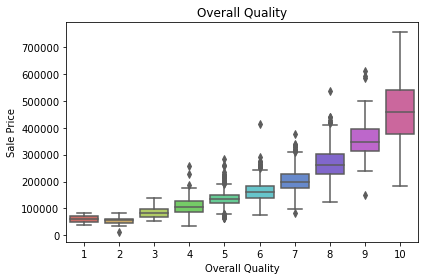

In [26]:
sns.boxplot(x = 'OverallQual',
            y = 'SalePrice',
            palette = 'hls',
            data = housing).set(title = 'Overall Quality',
                                xlabel = 'Overall Quality',
                                ylabel = 'Sale Price')
plt.tight_layout()
plt.savefig('OverallQual.png')

- CentralAir / HeatingQC

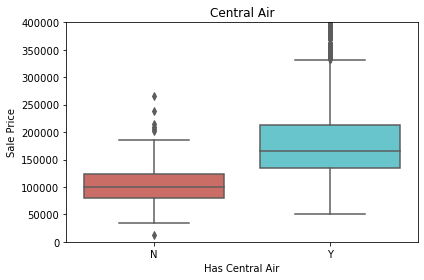

In [27]:
sns.boxplot(x = 'CentralAir',
            y = 'SalePrice',
            data = housing,
            palette = 'hls',
           order = ['N', 'Y']).set(title = 'Central Air',
                                   xlabel = 'Has Central Air',
                                   ylabel = 'Sale Price',
                                  ylim = (0,400000))
plt.tight_layout()
plt.savefig('CentralAir.png')

- Heating Quality

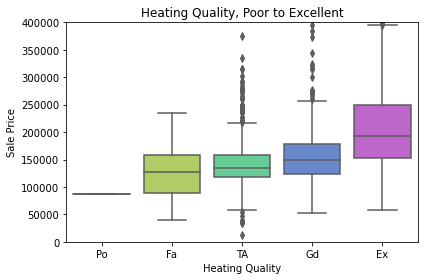

In [29]:
sns.boxplot(x = 'HeatingQC',
            y = 'SalePrice',
            order = ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
            data = housing,
            palette = 'hls').set(title = 'Heating Quality, Poor to Excellent',
                                   xlabel = 'Heating Quality',
                                   ylabel = 'Sale Price',
                                   ylim = (0, 400000))
plt.tight_layout()
plt.savefig('HeatingQuality.png')

- KitchenQual

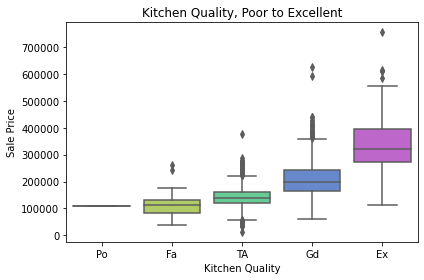

In [31]:
sns.boxplot(x = 'KitchenQual',
            y = 'SalePrice',
            data = housing,
            palette = 'hls',
            order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']).set(title = 'Kitchen Quality, Poor to Excellent',
                                                        xlabel = 'Kitchen Quality',
                                                        ylabel = 'Sale Price')
plt.tight_layout()
plt.savefig('KitchenQual.png')

- Fireplaces

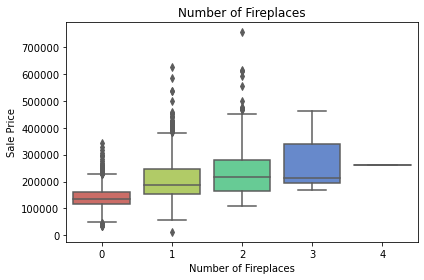

In [32]:
sns.boxplot(x = 'Fireplaces',
            y = 'SalePrice',
            data = housing,
            palette = 'hls').set(title = 'Number of Fireplaces',
                                xlabel = 'Number of Fireplaces',
                                ylabel = 'Sale Price')
plt.tight_layout()
plt.savefig('Fireplaces.png')

- MSZoning__RM

- GarageCars / Paved Driveway

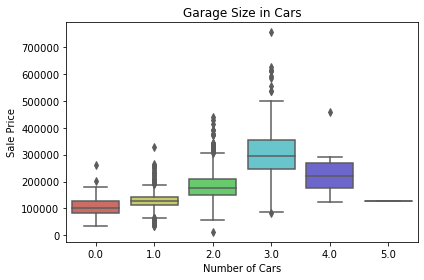

In [38]:
sns.boxplot(x = 'GarageCars',
            y = 'SalePrice',
            data = housing,
            palette = 'hls').set(title = 'Garage Size in Cars',
                                xlabel = 'Number of Cars',
                                ylabel = 'Sale Price')
plt.tight_layout()
plt.savefig('GarageSize.png')

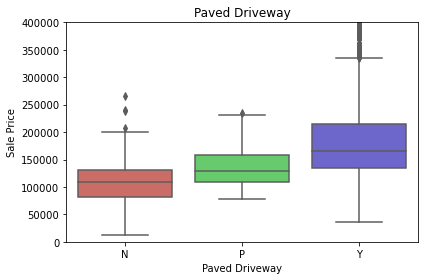

In [37]:
sns.boxplot(x = 'PavedDrive',
            y = 'SalePrice',
            data = housing,
            order = ['N', 'P', 'Y'],
            palette = 'hls').set(title = 'Paved Driveway',
                                xlabel = 'Paved Driveway',
                                ylabel = 'Sale Price',
                                ylim = (0,400000))
plt.tight_layout()
plt.savefig('PavedDrive.png')

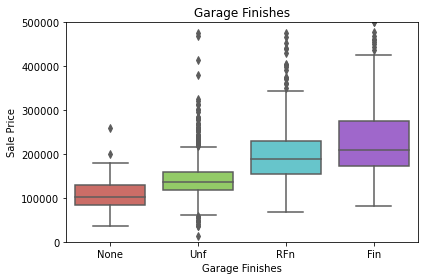

In [45]:
sns.boxplot(x = 'GarageFinish', y = 'SalePrice',
            order = ['None', 'Unf', 'RFn', 'Fin'],
            data = housing, palette = 'hls').set(title = 'Garage Finishes',
                                                 xlabel = 'Garage Finishes',
                                                 ylabel = 'Sale Price',
                                                 ylim = (0,500000))
plt.tight_layout()
plt.savefig('GarageFinish.png')

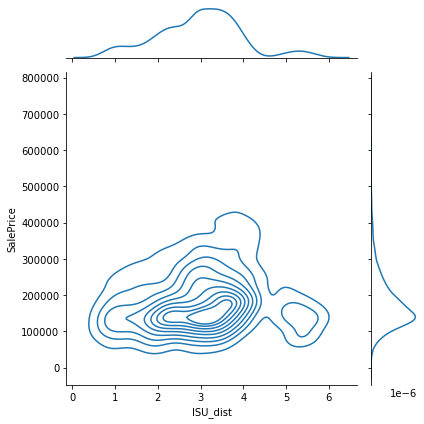

In [47]:
sns.jointplot(data = housing,
           x = 'ISU_dist', y = 'SalePrice',
           kind = 'kde', height = 6,
           multiple = 'fill',
           palette = 'hls')

plt.tight_layout()
plt.savefig('DistancefromISU.png')

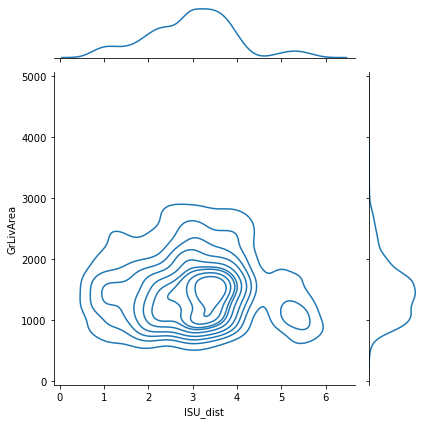

In [97]:
sns.jointplot(data = housing,
           x = 'ISU_dist', y = 'GrLivArea',
           kind = 'kde', height = 6,
           multiple = 'fill',
           palette = 'hls')

plt.tight_layout()
plt.savefig('HomeSizevsISUDist.png')

- ExterQual

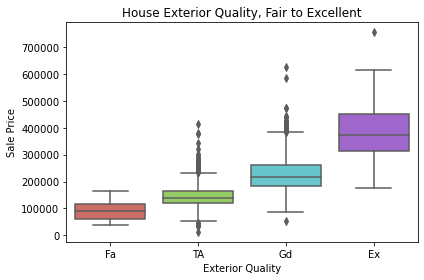

In [49]:
sns.boxplot(x = 'ExterQual',
            y = 'SalePrice',
            data = housing,
            order = ['Fa', 'TA', 'Gd', 'Ex'],
            palette = 'hls').set(title = 'House Exterior Quality, Fair to Excellent',
                                                  xlabel = 'Exterior Quality',
                                                  ylabel = 'Sale Price')
plt.tight_layout()
plt.savefig('ExterQual.png')

General Zoning Classification of Sale:

RL: Residential Low Density

RH: Residential High Density

RV: Floating Village Residential (sort of a TBD zone)

RM: Residential Medium Density

C: Commercial

(Top-10 removed Industrial & Agricultural Zones)

## Alternative Conditions

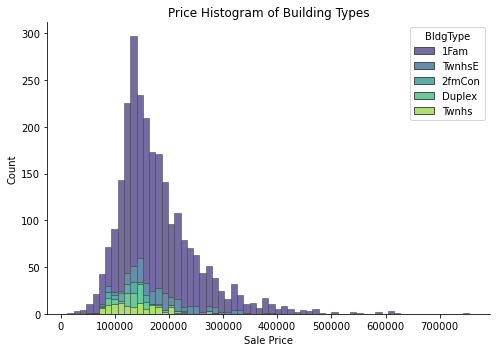

In [52]:
f, ax = plt.subplots(figsize = (7, 5))
sns.despine(f)

sns.histplot(housing, x = 'SalePrice', hue = 'BldgType',
            multiple = 'stack', palette = 'viridis',
            edgecolor = '.3').set(title = 'Price Histogram of Building Types', xlabel = 'Sale Price')

plt.tight_layout()
plt.savefig('BuildingType1.png')

C:\Users\David\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


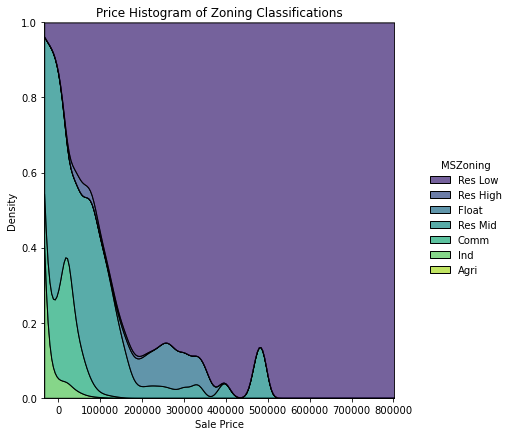

In [55]:
sns.displot(data = housing,
           x = 'SalePrice', hue = 'MSZoning',
           kind = 'kde', height = 6,
           multiple = 'fill',
           palette = 'viridis').set(title = 'Price Histogram of Zoning Classifications', xlabel = 'Sale Price')

plt.savefig('Zoning2.png')

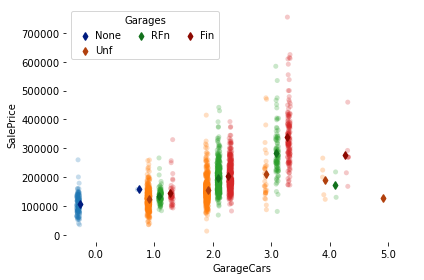

In [89]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="GarageCars", y="SalePrice", hue="GarageFinish",
              data=housing, hue_order = ['None', 'Unf', 'RFn', 'Fin'], dodge=True, alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="GarageCars", y="SalePrice", hue="GarageFinish",
              data=housing, hue_order = ['None', 'Unf', 'RFn', 'Fin'], dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[4:], labels[4:], title="Garages",
          handletextpad=0, columnspacing=1,
          loc="upper left", ncol=3, frameon=True)

plt.tight_layout()
plt.savefig('GarageTypes.png')

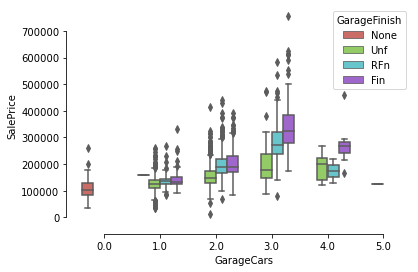

In [78]:
sns.boxplot(x="GarageCars", y="SalePrice",
            hue="GarageFinish", palette= 'hls',
            data=housing, hue_order = ['None', 'Unf', 'RFn', 'Fin'])
sns.despine(offset=10, trim=True)